In [1]:
# Hola Diego!

# Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

# Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

# _**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

# Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


# <div class="alert alert-block alert-success">
# <b>Comentario del revisor</b> <a class=“tocSkip”></a>
# Si todo está perfecto.
# </div>

# <div class="alert alert-block alert-warning">
# <b>Comentario del revisor</b> <a class=“tocSkip”></a>
# Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
# </div>

# <div class="alert alert-block alert-danger">
# <b>Comentario del revisor</b> <a class=“tocSkip”></a>
# Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
# </div>

# Puedes responderme de esta forma:
# <div class="alert alert-block alert-info">
# <b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
# </div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
# importar librerías

In [3]:
# leer conjuntos de datos en los DataFrames
instacart_df=pd.read_csv('/datasets/instacart_orders.csv',sep=';')
products_df=pd.read_csv('/datasets/products.csv', sep=';')
aisles_df=pd.read_csv('/datasets/aisles.csv', sep=';')
departments_df=pd.read_csv('/datasets/departments.csv', sep=';')
order_products_df=pd.read_csv('/datasets/order_products.csv',sep=';')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo importando las librerías y cargando tus datos en celdas diferentes.
</div>

In [4]:
instacart_df.info(show_counts=True)# mostrar información del DataFrame
instacart_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [5]:
products_df.info(show_counts=True)# mostrar información del DataFrame
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [6]:
aisles_df.info(show_counts=True)# mostrar información del DataFrame
aisles_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [7]:
departments_df.info(show_counts=True)# mostrar información del DataFrame
departments_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [8]:
order_products_df.info(show_counts=True)# mostrar información del DataFrame
order_products_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, para complementar el análisis preliminar de tus datos haría falta que apliques `.describe()` para tener métricas estadísticas de cada columna en tu dataset. Además para el dataset de `order_products` cuando usas info() no te muestra la cantidad de filas, para esto debes incluir `show_counts=True` 
</div>


<div class="alert alert-block alert-info">
<b>Revisado</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

 Buen trabajo! Ahora tienes más detalle de tus datasets
</div>

## Conclusiones

Es fundamental una inspección a los archivos de donde estamos obteniendo los dataframes porque es ahí donde identificamos el estado de los datos y los caracteres que se están utilizando para dividir los datos en las distintas columnas. De lo contrario no se podría conocer la info de cada uno porque no conocemos la fuente de donde provienen y el código no se podría colocar correctamente.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Prestar atención en los valores duplicados para borrar las copias de las filas que detectemos que estén igual. Ubicar los valores ausentes para poder catalogarlos como desconocidos y que entren en esa categoría porque si no pueden pasar desapercibidos. Verificar y corregir los tipos de datos de las columnas de los dataframes 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
duplicated_instacart= instacart_df.duplicated().sum()  #suma de los duplicados
duplicates_instacart = instacart_df[instacart_df.duplicated()] #muestra de cuales son los duplicados

print(duplicates_instacart)
print('\n')
print(f"Número de duplicados: {duplicated_instacart}")
print('\n')

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Que todos fueron realizados el miercoles a las 2 am

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wed_2_am= instacart_df[(instacart_df['order_dow']==3) & (instacart_df['order_hour_of_day']==2)]
display(wed_2_am)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

Efectivamente hubo más pedidos realizados a esa hora de los que teníamos registro en los duplicados. Por lo tanto, analizando el objetivo del Data Frame; no puede haber dos pedidos con el mismo 'order_id' ya que cada pedido tiene un número unico e irrepetible.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el filtro aplicado y la revisión de duplicados! Te recomiendo no usar `print()` para mostrar resultados de DataFrame ya que como puedes observar se muestran como strings, en su lugar puedes usar `display()` y esto mostrará los resultados en formato de tabla. Te pediría ese ajuste para el resto de casos donde usas print para los dataframes
</div>

<div class="alert alert-block alert-info">
<b>Revisado</b> <a class=“tocSkip”></a>
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Ahora se presenta mejor tu DataFrame
</div>

In [11]:
# Elimina los pedidos duplicados
instacart_df=instacart_df.drop_duplicates(subset='order_id')

In [12]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_df.duplicated().sum())

0


In [13]:
# Vuelve a verificar si hay IDs duplicados de pedidos
print(instacart_df['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Se eliminan los valores duplicados y se asignan esos datos al data frame original para que ya no presente filas duplicadas cuando se utilicen para un próximo analisis. Se descartan las repeticiones de 'order_id'

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
duplicates_products=products_df[products_df.duplicated()]
duplicated_products=products_df.duplicated().sum()

print(duplicated_products)
print(f"Número de duplicados: {duplicates_products}")

0
Número de duplicados: Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [15]:
# Verifica si hay IDs duplicadas de productos
duplicated_id_products= products_df['product_id'].duplicated().sum()
print(duplicated_id_products)

0


In [16]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products_df['product_name']=products_df['product_name'].str.upper()
#print(products_df.head())
# duplicates=products_df[products_df['product_name'].duplicated()]
duplicated= products_df['product_name'].duplicated().sum()
# print(duplicates)
print(f"Número de duplicados: {duplicated}")

Número de duplicados: 1361


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo aplicando la transformación sobre la columna product_name
</div>

In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
products_df['product_name']= products_df['product_name'].fillna(value='')
products_df['product_name']=products_df['product_name'].replace('','UNKNOWN')
print(products_df['product_name'].value_counts())

products_df.drop_duplicates(subset='product_name',inplace=True)

# Imprimir el conteo de valores únicos en 'product_name'
print('\n')
print(products_df['product_name'].value_counts())

# Imprimir la columna 'product_name' sin duplicados
display(products_df['product_name'])

UNKNOWN                                       1258
GREEN TEA WITH GINSENG AND HONEY                 3
FRESH SCENT DISHWASHER DETERGENT WITH DAWN       2
ORGANIC BALSAMIC VINEGAR OF MODENA               2
ULTRAGEL PERSONAL LUBRICANT                      2
                                              ... 
MEDIUM CHEDDAR CHEESE SLICES                     1
CHILDREN'S CHESTAL HOMEOPATHIC MEDICINE          1
BABY VITAMIN C TABLETS                           1
THICK CUT BACON                                  1
DONUT HOUSE LIGHT ROAST COFFEE K CUPS            1
Name: product_name, Length: 48333, dtype: int64


QUESO OAXACA                                        1
SALAME- SOPRESSATA                                  1
QUICK COOKING STEEL CUT OATS                        1
CHILDREN'S DHA STRAWBERRY CHEWABLE SOFT GELS        1
TRADING COMPANY ALL NATURAL BLACK BEAN SPICY DIP    1
                                                   ..
HONEY WHEAT BERRY BREAD                             1
ORGANIC HUM

0                               CHOCOLATE SANDWICH COOKIES
1                                         ALL-SEASONS SALT
2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                                GREEN CHILE ANYTIME SAUCE
                               ...                        
49683            VODKA- TRIPLE DISTILLED- TWIST OF VANILLA
49684                   EN CROUTE ROAST HAZELNUT CRANBERRY
49685                                     ARTISAN BAGUETTE
49686           SMARTBLEND HEALTHY METABOLISM DRY CAT FOOD
49687                               FRESH FOAMING CLEANSER
Name: product_name, Length: 48333, dtype: object

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se descubrió que existian productos repetidos en la columna de 'product_name' y que poseían más de un id de producto dentro del dataframe. Los product id no tenían repetidos porque son numeros secuanciales dentro de la tabla original. La tarea de hacer los strings a mayusculas ayuda a detectar los productos repetidos ya que pone a todos los productos en las mismas condiciones. Finalmente se eliminan los duplicados para conservar un solo Id de un solo producto.

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
duplicates_departments_df= departments_df[departments_df.duplicated()]
duplicated_departments_df= departments_df.duplicated().sum()
print(duplicates_departments_df)
print(duplicated_departments_df)

Empty DataFrame
Columns: [department_id, department]
Index: []
0


In [19]:
# Revisa si hay IDs duplicadas de productos
duplicates_department_id= departments_df['department_id'].duplicated().sum()
print(duplicates_department_id)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Es un dataframe muy pequeño con apenas 21 filas, no posee filas duplicadas y menos id de departamentos, todos son unicos.

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
duplicated_aisles_df=aisles_df.duplicated().sum()
print(duplicated_aisles_df)

0


In [21]:
# Revisa si hay IDs duplicadas de productos
duplicated_id_products_aisles=aisles_df['aisle_id'].duplicated().sum()
print(duplicated_id_products_aisles)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Sucede lo mismo que con departments, no existen valores duplicados en este dataframe

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
duplicated_order_products= order_products_df.duplicated().sum()
print(duplicated_order_products)
order_products_df= order_products_df.drop_duplicates()
print(order_products_df.duplicated().sum())

0
0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products_df['order_id']=order_products_df['order_id'].fillna(value='')
order_products_df['order_id']=order_products_df['order_id'].replace('','UNKNOWN')
print(order_products_df['order_id'].value_counts())
print('\n')
#order_products_df['order_id']=order_products_df.drop_duplicates(subset='order_id')
print(order_products_df['order_id'].value_counts())

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64


61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hubo filas identicas pero en los id de las ordenes si había algunas que se repetían, sin embargo cada uno es distinto porque son los productos que se fueron agregando en orden, por lo que no representan datos duplicados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la revisión de estos últimos datasets
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
products_na=products_df[products_df['product_name'].isna()]# Encuentra los valores ausentes en la columna 'product_name'
print(products_na)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

Existen valores ausentes en la columna de product_name. Los cuales tienen en común que el id del pasillo y del departamento. Deben haber sido asignados de esa manera al tener esos valores faltantes.

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
##El analisis se hizo antes de ejecutar el comando que elimino los duplicados del nombre de los productos del data frame
#El cual es ----->   products_df.drop_duplicates(subset='product_name',inplace=True)

duplicated= products_df['product_name'].duplicated().sum()
print(duplicated)
products_na=products_df[(products_df['product_name'].isna())&(products_df['aisle_id']==100)]
print(products_na)

0
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

El analisis se hizo en en el apartado 5.2 donde se anticipo borrar los valores ausentes que unicamente tenían de diferencia el id de producto. Tanto el de pasillo como el de departamento eran los mismos entre ellos. Se confirma que todas las filas de los nombres de productos ausentes corresponden un ID de 100  del pasillo y un ID del departamento 21.

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products_nas=products_df[(products_df['product_name'].isna())&(products_df['aisle_id']==21)]
print(products_nas)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Los ejercicios en esta sección deben ser respondidos en base a tus datos, debes aplicar filtros según el enunciado
</div>

<div class="alert alert-block alert-info">
<b>Revisado</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Recuerda que en tu profesión debes plantear preguntas y responderla en base a los datos que tienes
</div>

Describe brevemente cuáles son tus hallazgos.

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
pasillo_100= aisles_df[aisles_df['aisle_id']==100]
depto_21= departments_df[departments_df['department_id']==21]
print(pasillo_100)
print(depto_21)

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Aplicaste los filtros sobre los datasets correctos para obtener el resultado
</div>

Describe brevemente cuáles son tus hallazgos.

Las categorias se encuentran como faltantes y no están en un apartado bien definido por parte de instacart

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df['product_name']= products_df['product_name'].fillna(value='')
products_df['product_name']=products_df['product_name'].replace('','UNKNOWN')
print(products_df['product_name'].value_counts())

products_df['product_name']=products_df['product_name'].drop_duplicates()
print('\n')
print(products_df['product_name'].value_counts())

QUESO OAXACA                                        1
SALAME- SOPRESSATA                                  1
QUICK COOKING STEEL CUT OATS                        1
CHILDREN'S DHA STRAWBERRY CHEWABLE SOFT GELS        1
TRADING COMPANY ALL NATURAL BLACK BEAN SPICY DIP    1
                                                   ..
HONEY WHEAT BERRY BREAD                             1
ORGANIC HUMMUS                                      1
CREAMY QUESO FRESCO CHIPOTLE                        1
SPRING & RENEWAL HEAVY TRAFFIC CARPET FOAM          1
DONUT HOUSE LIGHT ROAST COFFEE K CUPS               1
Name: product_name, Length: 48333, dtype: int64


QUESO OAXACA                                        1
SALAME- SOPRESSATA                                  1
QUICK COOKING STEEL CUT OATS                        1
CHILDREN'S DHA STRAWBERRY CHEWABLE SOFT GELS        1
TRADING COMPANY ALL NATURAL BLACK BEAN SPICY DIP    1
                                                   ..
HONEY WHEAT BERRY BREAD         

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Detecte que había valores faltantes y los clasifique con el string de 'Unknown' para que entraran en una categoría visible para value_counts()

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
#La columna 'days_since_prior_order' de la tabla orders.
aus_instacart=instacart_df[instacart_df['days_since_prior_order'].isnull()]
display(aus_instacart)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
#No
aus_instacart2=instacart_df[(instacart_df['days_since_prior_order'].isnull())&(instacart_df['order_number']>1)]
display(aus_instacart2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay valores ausente que no sean el primer pedido según la busqueda

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
#La columna 'add_to_cart_order' de la tabla order_productos.
aus_add_to_cart=order_products_df[order_products_df['add_to_cart_order'].isna()]
display(aus_add_to_cart)

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_add_to_cart=order_products_df['add_to_cart_order'].min()
max_add_to_cart=order_products_df['add_to_cart_order'].max()
print(min_add_to_cart)
print(max_add_to_cart)

1.0
64.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo buscando los valores máximos y mínimos!
</div>

Describe brevemente cuáles son tus hallazgos.

El mínimo de productos que se podrán agregar a la lista de compras o 'al carrito' será siempre de 1 para que quede registrado. El máximo alcanza un valor de 64 productos agregados en un id de orden

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
aus_id_products=order_products_df[order_products_df['add_to_cart_order'].isnull()][['order_id','product_id','add_to_cart_order']]
display(aus_id_products)
sixtyf_id_product=order_products_df[order_products_df['add_to_cart_order'].isnull()]['order_id']
display(sixtyf_id_product)

,order_id,product_id,add_to_cart_order
737,2449164,5068,NaN
9926,1968313,43867,NaN
14394,2926893,11688,NaN
16418,1717990,4142,NaN
30114,1959075,42828,NaN
...,...,...,...
4505662,1800005,7411,NaN
4511400,1633337,260,NaN
4517562,404157,9517,NaN
4534112,1673227,17835,NaN


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

ausentes= order_products_df[order_products_df['order_id'].isin(sixtyf_id_product)]
# print(ausentes)

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
aus_id_products_grouped= ausentes.groupby('order_id')['product_id'].count()
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
display(aus_id_products_grouped)
print(f"El valor mínimo es de :{aus_id_products_grouped.min()}")
print(f"El valor máximo es de :{aus_id_products_grouped.max()}")
print(f"El tamaño del df es: {aus_id_products_grouped.size}")



order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

El valor mínimo es de :65
El valor máximo es de :127
El tamaño del df es: 70


Describe brevemente cuáles son tus hallazgos.

Los valores ausentes en add to cart tienen un id de orden e id de producto en específico que permiten contar la cantidad de apariciones una vez que se agrupa el dataframe con las filas que tienen valores ausentes en la columna add to cart. Se cuentan los productos que pertenecen a una id de orden precisa. Por lo tanto las ordenes con pedidos ausentes si tienen por encima de 64 productos como se obserca en el valor mínimo.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para revisar si los pedidos con valores ausentes tienen o no más de 64 pedidos deberías usar las order_id que que tienes en la variable `aus_id_products` (Solo toma los valores de la columna order_id) y filtrar en el dataset original utilizando `isin()` y luego si agrupar por order_id y contar en product_id, ya que de la forma en que lo estás haciendo solo cuenta cuantos valores ausentes hay por órden pero puede que tengas órdenes que tiene valores ausentes y también valores que no lo son y lo que interesa es contar todos estos datos.
</div>

<div class="alert alert-block alert-info">
<b>Revisado</b> <a class=“tocSkip”></a>
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Excelente! Ahora encontraste que la respuesta que tienen más de 64 productos
</div>

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products_df['add_to_cart_order']=order_products_df['add_to_cart_order'].fillna('')
order_products_df['add_to_cart_order']=order_products_df['add_to_cart_order'].replace('',999)
order_products_df['add_to_cart_order']=order_products_df['add_to_cart_order'].astype('int')
display(order_products_df[order_products_df['product_id']==5068])

,order_id,product_id,add_to_cart_order,reordered
268,2147452,5068,14,1
737,2449164,5068,999,0
23484,127775,5068,13,0
24430,2926064,5068,13,0
24502,1719719,5068,2,1
...,...,...,...,...
4520088,2734781,5068,2,1
4520089,1637684,5068,5,1
4526118,947158,5068,16,1
4530955,338975,5068,19,0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se llenaron los valores ausentes con un '' que es unicamente un espacio y después se sustituyo por un 999 como dicta el ejercicio. Posteriormente los valores de la columna se pusieron como enteros y se imprió el dataframe para ver el arreglo.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Se verifica que no haya duplicados dentro de las filas del dataframe porque podrían influir en el analisis posterior. También en cada columna, dependiendo el tipo de dato, debemos de identificar si puede haber duplicados que se hayan escrito de diferente manera y que representen de cierta forma un conjunto de valores que no se estén tomando en cuenta. Con los valores faltantes se debe de tener cuidado para poder contabilizarlos y cambiarlos , ya que puede que sea un dato descartable o que se necesite de otra columna o data frame para poder dar con el valor que le corresponde.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
#instacart_orders.csv: cada fila corresponde a un pedido en la aplicación Instacart.

 #   'order_id': número de ID que identifica de manera única cada pedido.
  #  'user_id': número de ID que identifica de manera única la cuenta de cada cliente.
   # 'order_number': el número de veces que este cliente ha hecho un pedido.    
    #'order_dow': día de la semana en que se hizo el pedido (0 si es domingo).
    #'order_hour_of_day': hora del día en que se hizo el pedido.
    #'days_since_prior_order': número de días transcurridos desde que este cliente hizo su pedido anterior.

In [37]:

ver_instacart_hours=instacart_df['order_hour_of_day'].value_counts(ascending=True).sort_index()

display(ver_instacart_hours)


0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [38]:
ver_instacart_dow=instacart_df['order_dow'].value_counts(dropna=False)
display(ver_instacart_dow)

0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: order_dow, dtype: int64

Escribe aquí tus conclusiones

Ambas columnas tienen un valor lógico, donde las horas del día son 24 valores y los días de la semana van del 0 al 6 como dicen las instrucciones. Con el comando de value counts obtuvimos la visualización de la repetición de esos valores.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Buen trabajo, otra forma en la que podías ver los valores en estas columnas era aplicando `.unique()` sobre las mismas
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

order_hour_of_day
0      48465
1      27270
2      15714
3      12839
4      12330
5      24993
6      81257
7     252394
8     475081
9     668128
10    722486
11    685787
12    642438
13    662132
14    673546
15    670302
16    628899
17    517533
18    407999
19    315489
20    245089
21    190347
22    144918
23     92213
Name: order_number, dtype: int64
48465




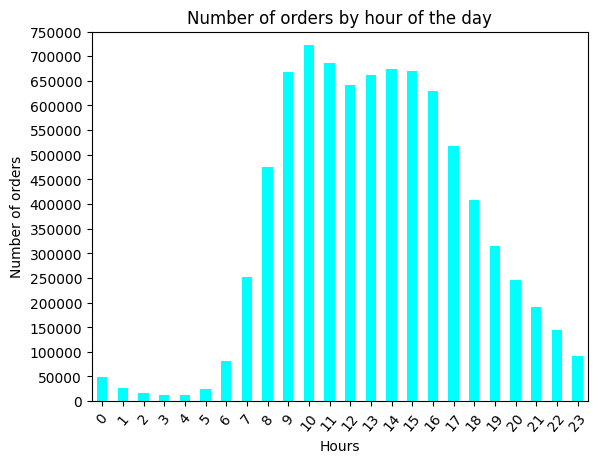

In [39]:
#pr_instacart_hours=instacart_df.groupby('order_hour_of_day')['order_hour_of_day'].count()
#print(pr_instacart_hours[0,5])
#print(instacart_df.groupby('order_hour_of_day').count())

instacart_grouped=instacart_df.groupby(by='order_hour_of_day')['order_number'].sum()
print(instacart_grouped)

prueba=instacart_df[instacart_df['order_hour_of_day']==0]['order_number'].sum()
print(prueba)
print('\n')
instacart_grouped.plot(x='order_hour_of_day', y='order_number',kind='bar'
                       ,title='Number of orders by hour of the day', xlabel='Hours'
                       ,ylabel='Number of orders',color='cyan',
                        ylim=[0,750000],rot=50 )
plt.yticks(range(0, 750001, 50000))
plt.show()

Escribe aquí tus conclusiones

A partir de las 9 de la mañana se tiene una alza en cuanto a numero de pedidos y el número de pedidos alcanza su máximo pico de ordenes a la siguiente hora, a las 10. De 9 de la mañana a las 4 de la tarde se tiene una gran actividad por parte de los usuarios de la aplicación, ya que se mantienen por encima de las 500 000 ordenes, cada hora de forma individual

### [A3] ¿Qué día de la semana compran víveres las personas?

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_number, dtype: int64
65833


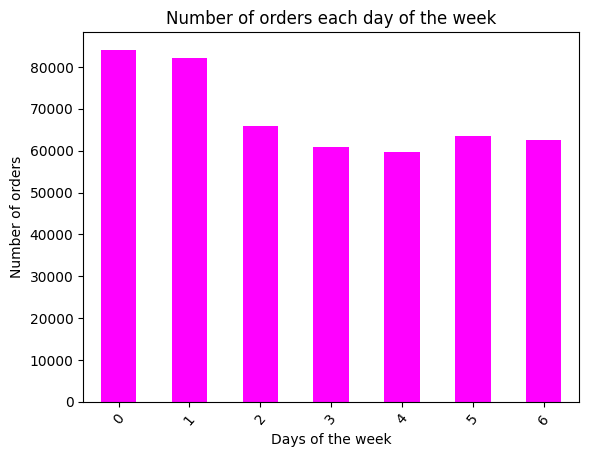

In [40]:
instacart_day_group= instacart_df.groupby('order_dow')['order_number'].count()
print(instacart_day_group)

prueba=instacart_df[instacart_df['order_dow']==2]['order_number'].count()

print(prueba)
ax=instacart_day_group.plot(x='order_dow',y='order_number',kind='bar',ylabel='Number of orders', xlabel= 'Days of the week', title='Number of orders each day of the week', color='magenta', rot=50)


Escribe aquí tus conclusiones 

El domingo es el día que más ordenes se reciben por parte de la aplicación y le sigue el Lunes. Se aprecia que conforme avanza la semana el número de ordenes va decayendo, siendo el viernes cuando vuelve a crecer el número de ordenes recibidas y volviendo a disminuir el sábado.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

0      9589
1     20179
2     27138
3     30224
4     31006
5     30096
6     33930
7     44577
8     25361
9     16753
10    13309
11    11467
12    10658
13    11737
14    13992
15     9416
16     6587
17     5498
18     4971
19     4939
20     5302
21     6448
22     4514
23     3337
24     3015
25     2711
26     2640
27     2986
28     3745
29     2673
30    51337
Name: Frecuency, dtype: int64
30224


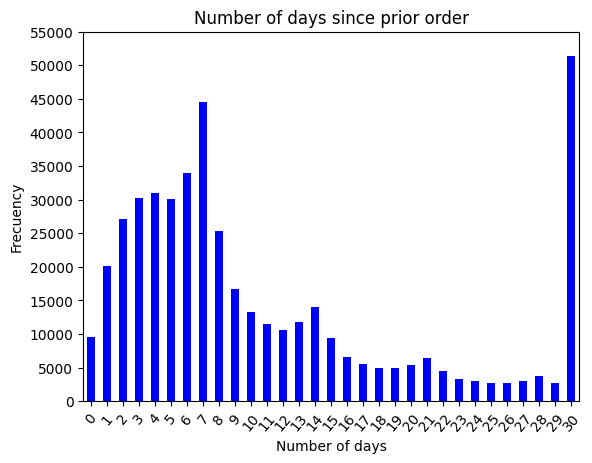

In [41]:
instacart_wait_group= instacart_df.groupby('days_since_prior_order')['days_since_prior_order'].count()
instacart_wait_group=instacart_wait_group.reset_index(name='Frecuency')
instacart_wait_group=instacart_wait_group['Frecuency'].astype(int)
print(instacart_wait_group)
prueba=instacart_df[instacart_df['days_since_prior_order']==3]['days_since_prior_order'].count()
print(prueba)

instacart_wait_group.plot(x='days_since_prior_order',xlabel='Number of days',y='Frecuency',ylabel='Frecuency',kind='bar', color='blue',rot=50, title='Number of days since prior order')
plt.yticks(range(0, 60000, 5000))
plt.show()

Escribe aquí tus conclusiones

Se muestra en la gráfica la frecuencia con la que las personas esperan cierta cantidad pawra volver a hacer otro pedido. Destaca el número 30 como el número de días que la mayoría de la gente espera antes de hacer otro pedido. 25 días es el número de días que menos gente se espera para volver a hacer otro pedido. A los 7 días también hay un gran repunte destacable.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con estas visualizaciones y conclusiones
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

order_hour_of_day
0      6088
1      3046
2      1705
3      1535
4      1851
5      2663
6     12488
7     33830
8     59489
9     85325
10    91330
11    90673
12    82407
13    82798
14    86964
15    91247
16    86340
17    71524
18    58865
19    43036
20    32935
21    25021
22    19672
23    12133
Name: order_number, dtype: int64
order_hour_of_day
0      6490
1      3839
2      2676
3      2440
4      1872
5      2895
6      7497
7     29837
8     58713
9     75359
10    81604
11    82113
12    81065
13    84484
14    87461
15    83894
16    78643
17    67873
18    51902
19    42026
20    28427
21    24676
22    19893
23    14149
Name: order_number, dtype: int64
order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_numb

,Orders Wed,Orders Sat,hours
order_hour_of_day,,,
0,6088,6490,0
1,3046,3839,1
2,1705,2676,2
3,1535,2440,3
4,1851,1872,4
5,2663,2895,5
6,12488,7497,6
7,33830,29837,7
8,59489,58713,8


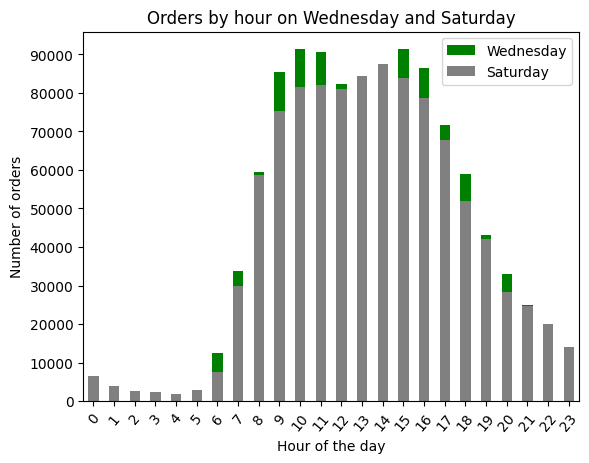

In [42]:
wed_order_day=instacart_df[instacart_df['order_dow']==3].groupby('order_hour_of_day')['order_number'].sum()
print(wed_order_day)
sab_order_day=instacart_df[instacart_df['order_dow']==6].groupby('order_hour_of_day')['order_number'].sum()
print(sab_order_day)
# Hacer el merge
two_days = pd.concat([wed_order_day, sab_order_day], axis='columns')
two_days.columns= ['Orders Wed','Orders Sat']
prueba2=instacart_df.groupby('order_hour_of_day')['order_number'].count()
print(prueba2)
two_days['hours']=two_days.index

display(two_days)


two_days['Orders Wed'].plot(kind='bar',color='green', title='Orders by hour on Wednesday and Saturday',xlabel='Hour of the day', ylabel='Number of orders',rot=50)
two_days['Orders Sat'].plot(kind='bar',color='gray',xlabel='Hour of the day', ylabel='Number of orders', rot=50)
plt.legend(['Wednesday', 'Saturday']) # leyenda, que sigue el mismo orden trazado anteriormente
plt.yticks(range(0, 100000, 10000))
plt.show()

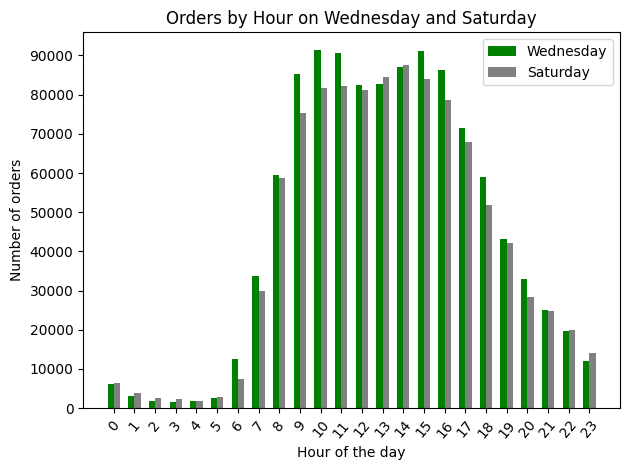

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Crear las series para miércoles y sábado
wed_order_day = instacart_df[instacart_df['order_dow'] == 3].groupby('order_hour_of_day')['order_number'].sum()
sab_order_day = instacart_df[instacart_df['order_dow'] == 6].groupby('order_hour_of_day')['order_number'].sum()

# Concatenar las dos series en un DataFrame
two_days = pd.concat([wed_order_day, sab_order_day], axis='columns')
two_days.columns = ['Orders Wed', 'Orders Sat']
two_days['hours'] = two_days.index

index = np.arange(len(two_days['hours']))

plt.bar(index, two_days['Orders Wed'], width=0.3, color='green', label='Wednesday', align='center')
plt.bar(index + 0.3, two_days['Orders Sat'], width=0.3, color='gray', label='Saturday', align='center')

plt.title('Orders by Hour on Wednesday and Saturday')
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.xticks(index + 0.3 / 2, two_days['hours'], rotation=50)
plt.legend()
plt.yticks(range(0, 100000, 10000))

plt.tight_layout()
plt.show()


In [44]:
order_per_client= instacart_df['user_id'].value_counts()
print(order_per_client.iloc[1])
display(instacart_df)

26


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


Escribe aquí tus conclusiones

Los miércoles existe un mayor número de ordenes por hora que los sábados, considerando el tiempo en el que más ordenes son recibidas por la aplicación, que se estableció entre 9 de la mañana y 4 de la tarde. Por debajo de las 20 000 ordenes en ambos días(de la 1 a la 5, y de las 10 a las 11), los sábados se recibe un mayor número de ordenes. Superando esa cantidad, los miercoles presentan un mayor número de ordenes que los Sábados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la gráfica! Es muy intuitivo hacer la comparación de esa forma
</div>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
#instacart_orders.csv: cada fila corresponde a un pedido en la aplicación Instacart.

 #   'order_id': número de ID que identifica de manera única cada pedido.
  #  'user_id': número de ID que identifica de manera única la cuenta de cada cliente.
   # 'order_number': el número de veces que este cliente ha hecho un pedido.    
    #'order_dow': día de la semana en que se hizo el pedido (0 si es domingo).
    #'order_hour_of_day': hora del día en que se hizo el pedido.
    #'days_since_prior_order': número de días transcurridos desde que este cliente hizo su pedido anterior.
    
# Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).

      index  user_id
0      2482     8220
1      4552   164906
2      6402   172294
3      9581    28775
4     10102    84500
..      ...      ...
189  468876    56886
190  471468    56033
191  472637   175294
192  475907    35061
193  477403    25422

[194 rows x 2 columns]
order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64


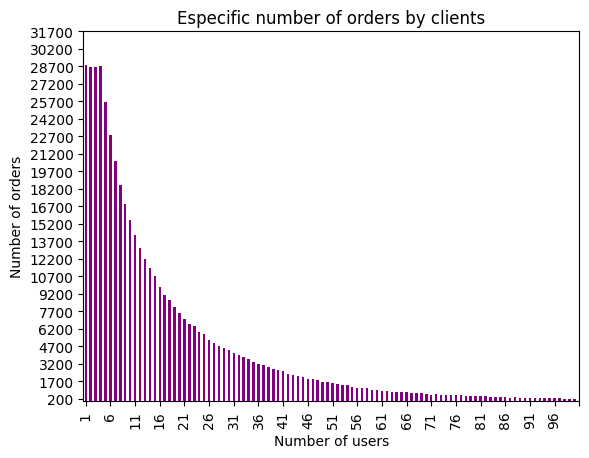

In [46]:
num_orders_per_client= instacart_df.groupby('order_number')['user_id'].count()

prueba3=instacart_df[instacart_df['order_number']==100]['user_id'].reset_index()
print(prueba3)

print(num_orders_per_client)


num_orders_per_client.plot(kind='bar',x='order_number',y='user_id', title='Especific number of orders by clients',xlabel='Number of users', ylabel='Number of orders',legend=False,color='purple')


plt.yticks(range(200, 32000, 1500))
plt.xticks(range(0, 105, 5))
plt.show()

Escribe aquí tus conclusiones

Se presenta el número de personas que ordenan una cantidad especifica de ordenes. Es decir, que existen un determinado número de clientes que unicamente ordenaron un número especifico de ordenes. Son pocos los que hacen muchos pedidos, por lo que mantiene una relación inversamente proporcional porque si uno aumenta la otra variable disminuye. La gráfica de barras nos permite identificar de inmediato el número de pedidos en la escala del eje y. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?


,product_id,order_id
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


,product_name
product_id,
1,CHOCOLATE SANDWICH COOKIES
2,ALL-SEASONS SALT
3,ROBUST GOLDEN UNSWEETENED OOLONG TEA
4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
5,GREEN CHILE ANYTIME SAUCE
...,...
49684,VODKA- TRIPLE DISTILLED- TWIST OF VANILLA
49685,EN CROUTE ROAST HAZELNUT CRANBERRY
49686,ARTISAN BAGUETTE


,product_id,order_id,product_name
0,24852,66050,BANANA
1,13176,53297,BAG OF ORGANIC BANANAS
2,21137,37039,ORGANIC STRAWBERRIES
3,21903,33971,ORGANIC BABY SPINACH
4,47209,29773,ORGANIC HASS AVOCADO
5,47766,24689,ORGANIC AVOCADO
6,47626,21495,LARGE LEMON
7,16797,20018,STRAWBERRIES
8,26209,19690,LIMES
9,27845,19600,ORGANIC WHOLE MILK


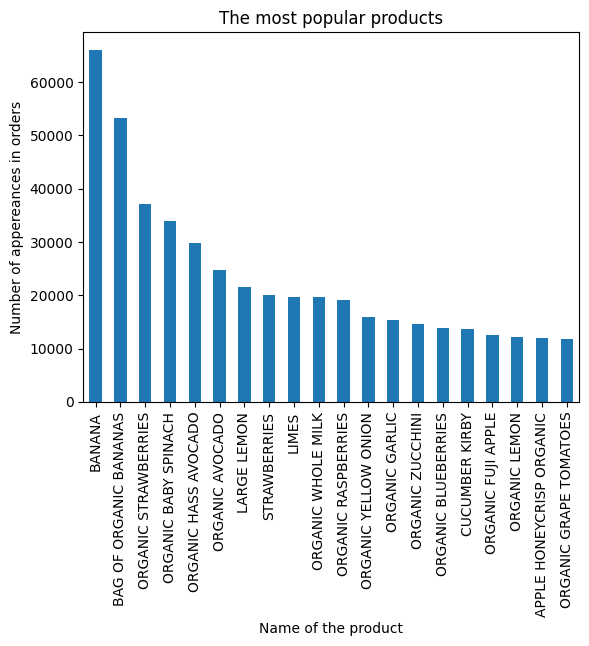

In [47]:
# products.csv: cada fila corresponde a un producto único que pueden comprar los clientes.

#     'product_id': número ID que identifica de manera única cada producto.
#     'product_name': nombre del producto.
#     'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
#     'department_id': número ID que identifica de manera única cada departamento de víveres.

# order_products.csv: cada fila corresponde a un artículo pedido en un pedido.

#     'order_id': número de ID que identifica de manera única cada pedido.
#     'product_id': número ID que identifica de manera única cada producto.
#     'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito.
#     'reordered': 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.

#Localizar los más vendidos
best_twenty= order_products_df.groupby('product_id')['order_id'].count().sort_values(ascending=False).reset_index()
display(best_twenty.head(19))

#Localizar el nombre
best_twenty_name= products_df[['product_id','product_name']].set_index('product_id')
display(best_twenty_name)

know_name=best_twenty.merge(best_twenty_name,on='product_id', how='left')
display(know_name.head(20))

know_name.head(20).plot(kind='bar',x='product_name',y='order_id',xlabel='Name of the product', ylabel='Number of appereances in orders',title='The most popular products',legend=False)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho el cálculo! Sin embargo, para mejorar la comparación de tus resultados es mejor mostrar una gráfica de barras
</div>

<div class="alert alert-block alert-info">
<b>Revisado</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Siempre es bueno mostrar una gráfica para facilitar la comparación
</div>

Escribe aquí tus conclusiones

Para obtener el listado se tuvo que contar el número de veces que los productos aparecian en las ordenes y de ahí ordenaros de mayor a menor para unicamente capturar en una tabla los primeros 20 productos. Se observa claramente el nombre de cada uno de ellos y las veces que aparecieron en las ordenes de los usuarios.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
#El order_id se repite por la secuencia de productos que se van ordenando

2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
# # order_products.csv: cada fila corresponde a un artículo pedido en un pedido.

# #     'order_id': número de ID que identifica de manera única cada pedido.
# #     'product_id': número ID que identifica de manera única cada producto.
# #     'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito.
# #     'reordered': 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.

# #users_orders= order_products_df[order_products_df['order_id']==11]
# #print(users_orders)

# users_orders= order_products_df.groupby('order_id')['product_id'].count()
# users_orders= users_orders.reset_index()
# users_orders_sorted = users_orders.sort_values(by='order_id', ascending=True)
# print(users_orders.head(20))

# # num_products_order= users_orders.groupby('product_id')['order_id'].count()
# # num_products_order= num_products_order.reset_index(name='count')
# # print(num_products_order)

# users_orders.plot(kind='hist',x='product_id',y='order_id',title='Number of products by a single order',ylabel='Ordered products',xlabel='Number of users',color='brown',rot=50,legend=False)
# # plt.yticks(range(0,34000,1500))

# plt.show()

# print(users_orders['product_id'].mean())


order_id
4      13
9      15
11      5
19      3
20      8
31     10
48      8
56     10
61     12
68      9
75     16
80      7
81     11
83     14
99      7
114    10
131    18
142     7
143    25
148    14
Name: product_id, dtype: int64
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


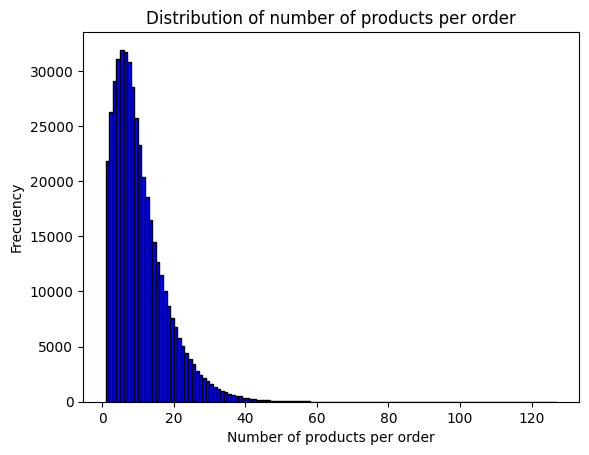

In [49]:
# Agrupar por 'order_id' y contar el número de 'product_id' por cada pedido
order_size = order_products_df.groupby('order_id')['product_id'].count()
print(order_size.head(20))
# Mostrar algunas estadísticas básicas
print(order_size.describe())

# Graficar la distribución
plt.hist(order_size, range(1, order_size.max() + 1), color='blue', edgecolor='black')
plt.title('Distribution of number of products per order')
plt.xlabel('Number of products per order')
plt.ylabel('Frecuency')
plt.show()

Escribe aquí tus conclusiones

Realmente son muchos los pedidos que tienen pocas cantidades de productos, entre mas productos sean por orden, menos pedidos son los que se registran.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

       product_id  index
0               1    122
1               2     11
2               3     11
3               4     24
4               7      1
...           ...    ...
43759       49690      1
43760       49691     41
43761       49692      7
43762       49693     14
43763       49694      6

[43764 rows x 2 columns]
       product_id  index
0               1    158
1               3     31
2               4     25
3               7      1
4               8      6
...           ...    ...
36223       49690      4
36224       49691     31
36225       49692      5
36226       49693     11
36227       49694      3

[36228 rows x 2 columns]


,product_id,frecuency,0 y 1
0,1,158,280.0
1,3,31,42.0
2,4,25,36.0
3,7,1,25.0
4,8,6,7.0
...,...,...,...
36223,49690,4,5.0
36224,49691,31,48.0
36225,49692,5,6.0
36226,49693,11,15.0


,product_id,frecuency,0 y 1
18104,24852,55763,55765.0
9528,13176,44450,44460.0
15368,21137,28639,28647.0
15936,21903,26233,26273.0
34407,47209,23629,23690.0
34828,47766,18743,18843.0
20285,27845,16251,16832.0
34725,47626,15044,15045.0
20375,27966,14748,14751.0
12193,16797,13945,14219.0


,product_id,frecuency,0 y 1,product_name
0,24852,55763,55765.0,BANANA
1,13176,44450,44460.0,BAG OF ORGANIC BANANAS
2,21137,28639,28647.0,ORGANIC STRAWBERRIES
3,21903,26233,26273.0,ORGANIC BABY SPINACH
4,47209,23629,23690.0,ORGANIC HASS AVOCADO
5,47766,18743,18843.0,ORGANIC AVOCADO
6,27845,16251,16832.0,ORGANIC WHOLE MILK
7,47626,15044,15045.0,LARGE LEMON
8,27966,14748,14751.0,ORGANIC RASPBERRIES
9,16797,13945,14219.0,STRAWBERRIES




36228
2683838
1861169
4545007


<AxesSubplot:title={'center':'The 20 most reordered products'}, xlabel='Name of the product', ylabel='Number of reorders'>

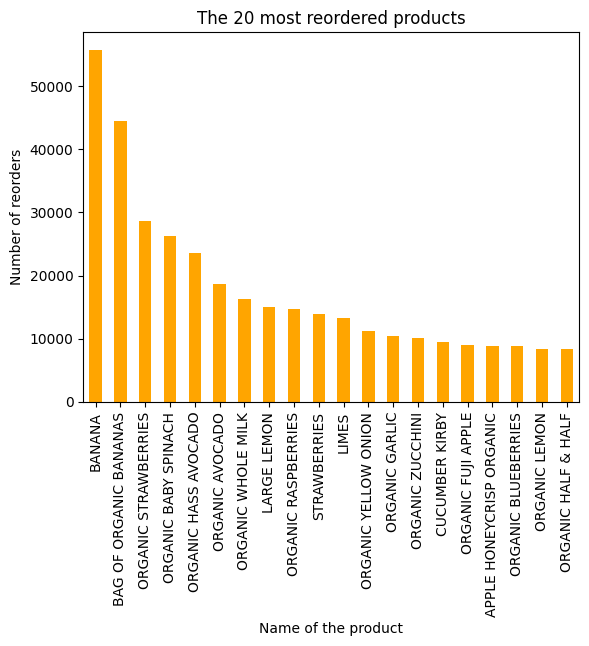

In [50]:
twenty_freq= order_products_df[order_products_df['reordered']==1].groupby('product_id')['product_id'].count()
twenty_freq_general= order_products_df[order_products_df['reordered']==0].groupby('product_id')['product_id'].count()
twenty_freq_general= twenty_freq_general.reset_index(name='index')
print(twenty_freq_general)
twenty_freq= twenty_freq.reset_index(name='index')



# twenty_freq_prove= order_products_df[order_products_df['reordered']==1].groupby('product_id')['reordered'].count()
# print(twenty_freq_prove)


print(twenty_freq)
twenty_freq.columns=['product_id','frecuency']
twenty_freq_general.columns=['product_id','frecuency']
twenty_freq['0 y 1']= twenty_freq['frecuency']+twenty_freq_general['frecuency']
display(twenty_freq)
twenty_freq=twenty_freq.sort_values(by='frecuency',ascending=False)
display(twenty_freq.head(20))

twenty_freq_name= products_df[['product_id','product_name']]
twenty_freq_name=twenty_freq_name.set_index('product_id')

twenty_merged=twenty_freq.merge(twenty_freq_name, on='product_id',how='left')



display(twenty_merged.head(20))

print('\n')
print(twenty_merged['frecuency'].count().sum())
print(order_products_df[order_products_df['reordered']==1]['reordered'].count())
print(order_products_df[order_products_df['reordered']==0]['reordered'].count())
print(order_products_df['order_id'].count())

twenty_merged.head(20).plot(legend=False,title='The 20 most reordered products',x='product_name',y='frecuency',xlabel='Name of the product',ylabel='Number of reorders', kind='bar',color='orange')


In [51]:
#     product_id  frecuency    0 y 1              product_name
# 0        24852      55763  55765.0                    BANANA
# 1        13176      44450  44460.0    BAG OF ORGANIC BANANAS
# 2        21137      28639  28647.0      ORGANIC STRAWBERRIES
# 3        21903      26233  26273.0      ORGANIC BABY SPINACH
# 4        47209      23629  23690.0      ORGANIC HASS AVOCADO
# 5        47766      18743  18843.0           ORGANIC AVOCADO
# 6        27845      16251  16832.0        ORGANIC WHOLE MILK
# 7        47626      15044  15045.0               LARGE LEMON
# 8        27966      14748  14751.0       ORGANIC RASPBERRIES
# 9        16797      13945  14219.0              STRAWBERRIES
# 10       26209      13327  13392.0                     LIMES
# 11       22935      11145  11150.0      ORGANIC YELLOW ONION
# 12       24964      10411  10415.0            ORGANIC GARLIC
# 13       45007      10076  10079.0          ORGANIC ZUCCHINI
# 14       49683       9538   9546.0            CUCUMBER KIRBY
# 15       28204       8989   9014.0        ORGANIC FUJI APPLE
# 16        8277       8836   8837.0  APPLE HONEYCRISP ORGANIC
# 17       39275       8799   9175.0       ORGANIC BLUEBERRIES
# 18        5876       8412   8433.0             ORGANIC LEMON
# 19       49235       8389   8390.0       ORGANIC HALF & HALF

Escribe aquí tus conclusiones

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Aquí también sería bueno incluir una gráfica de barras para mostrar la diferencia entre productos
</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [52]:
#3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
#4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
#5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

In [53]:
# twenty_freq2= order_products_df.groupby('product_id')['order_id'].count()
# # twenty_freq5= order_products_df.groupby('product_id')['reordered'].sum()


# twenty_freq2= twenty_freq2.reset_index()
# twenty_freq2['Prop prod'] = twenty_freq2['order_id'] / 2683838 #total de ordenes
# twenty_mp= order_products_df[order_products_df['reordered']==1].groupby('product_id')['order_id'].count()
# # twenty_mp=twenty_mp.reset.index(name='index')
# # twenty_freq3= order_products_df.groupby('product_id')['reordered'].count()
# # print(twenty_freq5)
# print(twenty_freq2.sort_values(by='order_id',ascending=False))
# print(twenty_mp)
# print(twenty_freq2.sum())
# # twenty_total= twenty_freq2.merge(twenty_mp,on='product_id',how='left')

#TASA DE REPETICIÓN
twenty_merged['Prop prod'] = twenty_merged['frecuency'] /twenty_merged['0 y 1'] 
print(twenty_merged['frecuency'].sum())
# Imprimir el DataFrame con la nueva columna
display(twenty_merged)

2683838


,product_id,frecuency,0 y 1,product_name,Prop prod
0,24852,55763,55765.0,BANANA,0.999964
1,13176,44450,44460.0,BAG OF ORGANIC BANANAS,0.999775
2,21137,28639,28647.0,ORGANIC STRAWBERRIES,0.999721
3,21903,26233,26273.0,ORGANIC BABY SPINACH,0.998478
4,47209,23629,23690.0,ORGANIC HASS AVOCADO,0.997425
...,...,...,...,...,...
36223,7092,1,22.0,MELATONIN NUTRASPRAY SUBLINGUAL ORANGE FLAVOR,0.045455
36224,21003,1,44.0,WHITE CHOCOLATE MACADAMIA COFFEE CREAMER,0.022727
36225,32856,1,4.0,CRAB RANGOON,0.250000
36226,42727,1,39.0,CHOCOLATE LOVERS CHIPS DELUXE COOKIES,0.025641


Escribe aquí tus conclusiones

Se muestra el número de veces que se repite un producto en las ordenes de compra, el calculo son las compras generales entre las compras repetidas o reordenadas 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:
#     instacart_orders.csv: cada fila corresponde a un pedido en la aplicación Instacart.
#         'order_id': número de ID que identifica de manera única cada pedido.
#         'user_id': número de ID que identifica de manera única la cuenta de cada cliente.
#         'order_number': el número de veces que este cliente ha hecho un pedido.
#         'order_dow': día de la semana en que se hizo el pedido (0 si es domingo).
#         'order_hour_of_day': hora del día en que se hizo el pedido.
#         'days_since_prior_order': número de días transcurridos desde que este cliente hizo su pedido anterior.
#     products.csv: cada fila corresponde a un producto único que pueden comprar los clientes.
#         'product_id': número ID que identifica de manera única cada producto.
#         'product_name': nombre del producto.
#         'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
#         'department_id': número ID que identifica de manera única cada departamento de víveres.
#     order_products.csv: cada fila corresponde a un artículo pedido en un pedido.
#         'order_id': número de ID que identifica de manera única cada pedido.
#         'product_id': número ID que identifica de manera única cada producto.
#         'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito.
#         'reordered': 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
#     aisles.csv
#         'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
#         'aisle': nombre del pasillo.
#     departments.csv
#         'department_id': número ID que identifica de manera única cada departamento de víveres.
#         'department': nombre del departamento. 

instacart_order_products= instacart_df.merge(order_products_df,on='order_id',how='left')

print('\n')


prop_user= instacart_order_products[instacart_order_products['reordered']==1].groupby('user_id')['order_id'].count()
prop_user=prop_user.reset_index()
prop_user.columns=['user_id','num reordered 1']

print(prop_user)

print('\n')
prop_user_0= instacart_order_products[instacart_order_products['reordered']==0].groupby('user_id')['order_id'].count()
prop_user_0=prop_user_0.reset_index()
prop_user_0.columns=['user_id','num order 0']
print(prop_user_0)

print('\n')
prop_user_general=instacart_order_products.groupby('user_id')['order_id'].count()
prop_user_general=prop_user_general.reset_index()
prop_user.columns=['user_id','num reordered']
print(prop_user_general)

print('\n')
prop_user=prop_user.merge(prop_user_0,on='user_id',how='left')
print(prop_user)

prop_user=prop_user.merge(prop_user_general,on='user_id',how='left')
prop_user['prop user']= prop_user['num reordered']/prop_user['order_id']
prop_user.columns=['user_id','num reordered 1', 'num order 0','num orders general','proportion user']
display(prop_user)
# print(instacart_order_products)

# #twenty_reordered= twenty_freq[twenty_freq['']]

# print(twenty_freq)
# twenty_freq.columns=['product_id','frecuency']
# print(twenty_freq)
# twenty_freq=twenty_freq.sort_values(by='frecuency',ascending=False)
# print(twenty_freq.head(20))

# twenty_freq_name= products_df[['product_id','product_name']]
# twenty_freq_name=twenty_freq_name.set_index('product_id')

# twenty_merged=twenty_freq.merge(twenty_freq_name, on='product_id',how='left')

# print(twenty_merged)

# print(twenty_merged['frecuency'].count().sum())



        user_id  num reordered 1
0             2                1
1             5                8
2             7               13
3            11                3
4            12                3
...         ...              ...
132986   206203                6
132987   206206               15
132988   206207               41
132989   206208               87
132990   206209                8

[132991 rows x 2 columns]


        user_id  num order 0
0             2           25
1             4            2
2             5            4
3             6            4
4             7            1
...         ...          ...
141519   206203           21
141520   206206            6
141521   206207            5
141522   206208           38
141523   206209           17

[141524 rows x 2 columns]


        user_id  order_id
0             2        26
1             4         3
2             5        12
3             6         5
4             7        14
...         ...       ...
157432   20620

,user_id,num reordered 1,num order 0,num orders general,proportion user
0,2,1,25.0,26,0.038462
1,5,8,4.0,12,0.666667
2,7,13,1.0,14,0.928571
3,11,3,12.0,16,0.187500
4,12,3,9.0,12,0.250000
...,...,...,...,...,...
132986,206203,6,21.0,27,0.222222
132987,206206,15,6.0,21,0.714286
132988,206207,41,5.0,46,0.891304
132989,206208,87,38.0,125,0.696000


Escribe aquí tus conclusiones

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien calculadas las proporciones! También podrías haber usado el groupby y aplicando `mean()` sobre la columna de reordered
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [55]:
#¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos
#(muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el
#primer artículo en añadirse al carrito)?

#     order_products.csv: cada fila corresponde a un artículo pedido en un pedido.
#         'order_id': número de ID que identifica de manera única cada pedido.
#         'product_id': número ID que identifica de manera única cada producto.
#         'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito.
#         'reordered': 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
#     products.csv: cada fila corresponde a un producto único que pueden comprar los clientes.
#         'product_id': número ID que identifica de manera única cada producto.
#         'product_name': nombre del producto.
#         'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
#         'department_id': número ID que identifica de manera única cada departamento de víveres.

         order_id  product_id  add_to_cart_order  reordered  \
0         2141543       11440                 17          0   
1          567889        1560                  1          1   
2         2261212       26683                  1          1   
3          491251        8670                 35          1   
4         2571142        1940                  5          1   
...           ...         ...                ...        ...   
4545002    577211       15290                 12          1   
4545003   1219554       21914                  9          0   
4545004    692640       47766                  4          1   
4545005    319435         691                  8          1   
4545006   1398151       28733                  9          0   

                                              product_name  aisle_id  \
0                           CHICKEN BREAST TENDERS BREADED     129.0   
1                                               BAG OF ICE      37.0   
2        CAFE LATTE PURE LI

,product_id,times of first item in cart,product_name
0,24852,15562,BANANA
1,13176,11026,BAG OF ORGANIC BANANAS
2,27845,4363,ORGANIC WHOLE MILK
3,21137,3946,ORGANIC STRAWBERRIES
4,47209,3390,ORGANIC HASS AVOCADO
5,21903,3336,ORGANIC BABY SPINACH
6,47766,3044,ORGANIC AVOCADO
7,19660,2336,SPRING WATER
8,16797,2308,STRAWBERRIES
9,27966,2024,ORGANIC RASPBERRIES


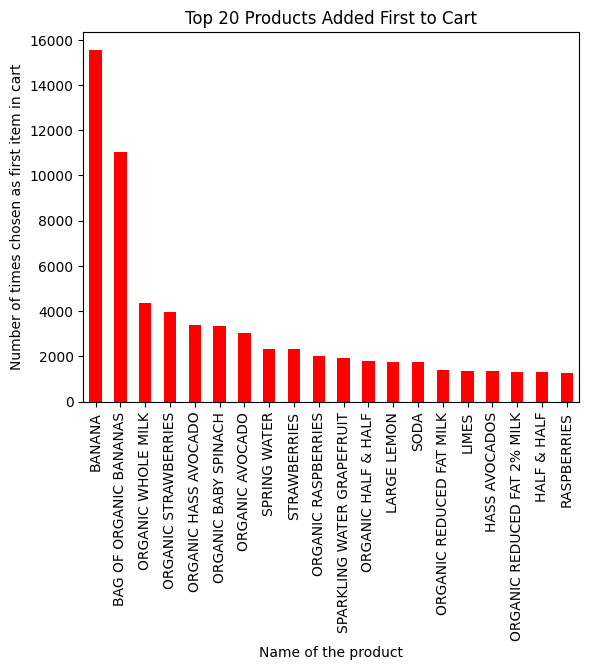

In [56]:
art_first_chosen=order_products_df.merge(products_df,on='product_id',how='left')
print(art_first_chosen)
art_first_chosen=art_first_chosen[['product_id','product_name','add_to_cart_order']]
art_first_chosen= art_first_chosen[art_first_chosen['add_to_cart_order']==1].groupby('product_id')['add_to_cart_order'].count()
art_first_chosen=art_first_chosen.reset_index()
art_first_chosen.columns=['product_id','times of first item in cart']
art_first_chosen=art_first_chosen.sort_values(by='times of first item in cart',ascending=False)
art_first= art_first_chosen.merge(products_df,on='product_id',how='left')
art_first=art_first.drop(columns=['aisle_id','department_id'])

display(art_first.head(20))

art_first.head(20).plot(title='Top 20 Products Added First to Cart',kind='bar',x='product_name',y='times of first item in cart',xlabel= 'Name of the product',ylabel='Number of times chosen as first item in cart',legend=False,color='red')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

También puedes usar un gráfico de barras para este resultado. Recuerda que debe ser solo el product_id, el nombre y la cantidad
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Revisado</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo!
</div>

Escribe aquí tus conclusiones


Estos análisis proporcionan una visión integral de los patrones de compra en la plataforma. Desde entender la distribución del número de artículos por pedido hasta identificar los productos que los clientes compran repetidamente y aquellos que eligen primero, cada análisis ofrece información valiosa que puede ser utilizada para mejorar la gestión de inventarios, personalizar las estrategias de marketing, y optimizar la experiencia de compra para los usuarios. Estos insights son esenciales para tomar decisiones informadas que pueden impulsar la eficiencia operativa y la satisfacción del cliente en la plataforma.

### Conclusion general del proyecto:

El proyecto me pareció extenso pero muy enriquecedor en cuanto a este Sprint que abarcó muchos capítulos con formas de filtrado de datos y la manipulación de los mismos. Sin duda fue una buena forma de practicar todo lo aprendido y de utilizar diferentes alternativas a la vez para rectificar que cumplen la misma función. Dejando la opción abierta para quién las emplea donde se decidirá cual  utilizar en cuanto a comodidad, beneficios en las características de cada herramienta y reducción de código.

En el primer apartado destaco que después de leer los dataframes se nos acostumbre a utilizar comandos como el de .describe() para ver en una tabla los cálculos básicos que debemos de considerar en las columnas de un conjunto de datos. La gestión de los duplicados siempre será uno de los procedimientos a dominar porque como se nos ha sido enseñado, este tipo de filtrados corresponden a la mayor parte del tiempo en el analisis de datos. Sobre todo tomar en cuenta que algunos datos debido a su falta de información se pueden ir descartando del análisis objetivo eliminandolos al detectarlos de inmediato. Siendo cuidadosos en que se debe de actualizar esa columna, asignando esa reducción de valores en la misma varible. Con la finalidad de trabajar con datos que no se repitan y que nos garanticen los resultados esperados. En el caso de que se encuentren filas repetidas pero con diferentes topografias o letras en mayuscula o minuscula, se deben hacer los reemplazos necesarios para que todas esas variantes conformen un apartado único y se puedan contar desde una única variable. Sucede lo mismo con los valores ausentes que se debe sustituir el NaN por una palabra que nos ayude a asignarlo correctamente en una sola variable y sea contabilizado y no excluido, o en algunos casos eliminado por falta de información importante para el desarrollo de nuestro filtrado. En la parte final donde se crean las gráficas a mi parecer es la más retadora debido a que aquí se debe usar una cierta lógica para poder descifrar lo que te quieren decir los enunciado de las instrucciones y poder interpretar lo que se busca encontrar en cada apartado. Desde verificar que los valores sean sensibles y que tengan buena relación entre ellos, hasta graficar el numero de pedidos por hora. Sin duda la cantidad de datos es elevada por el número de ordenes que se ven en las gráficas y el hecho de poderlos analizar con comandos de un nivel intermedio es bastante satisfactorio porque se comienza a dominar el uso de ellos en conjunto y al mismo tiempo para ver frecuencias entre los valores populares o que más se parecen, o también de aquellos que son mínimos. Las gráficas sencillamente nos pueden dar mucho de que analizar y con el correcto acomodo de las variables, del nombre de ellas y de las escalas y dimensiones, podemos comenzar a dar conclusiones que no se podrían tener sin construir resultados visuales. Se comienza de lo general a lo particular y la capacidad de poder detectar frecuencias entre los datos de forma muy profunda nos brinda mucha fuerza para las hipotesis que se tenían inicialmente. Incluso con el pensamiento crítico, poco a poco comienzas a responder preguntas que vienen más adelante en los ejercicios y que solamente tienes que contestar con el procedimiento que seguiste.

Hablando de los resultados obtenidos. Las horas donde más se hacen ordenes de compra durante el día, son dos horas antes y dos horas después de medio día. Sin emabargo en esa parte del día se mantiene una actividad alta en la aplicación. Se detectó que los días los cuales más pedidos se hacen son el Domingo y el Lunes. La mayoría de los usuarios suelen esperar 30 días para volver a solicitar otro pedido. Se muestra que pocos son los usuarios que hacen una gran cantidad de pedidos y que son muchos los que especificamente hacen al rededor de 200 pedidos aproximadamente. Conforme aumenta el número de personas disminuye el número de pedidos en específico. Algo muy interesante fue hallar los productos más populares o los más pedidos. Donde destacan las bananas, en presentación individual y en bolsa, las fresas organicas, las espinacas baby y el aguacate organico. En el top 20 encontrandose vegetales y frutas. Por último se muestra que el numero de productos por orden es reducido, quiere decir que la mayoria de ordenes contienen menos de 40 productos, siendo una relación inversamente proporcional con respecto a la frecuencia con la que se hacen. Entre menos productos por orden se ordenen, más ordenes son creadas con ese número de productos. Los productos que mas se reordenan se asemejan a los más populares con algunas diferencias significativas entre los primeros lugares, conservando a la banana en el primer lugar. Asimismo siendo reconocido como el producto que primero se agrega al carrito digital para ser comprado.En este apartado analizado si vemos un cambio significativo con los demás top 20. Para concluir se saca la proporcion por usuario y por producto que son nada más y nada menos que sus tasas de repetición que se sacan ordenando dos categorias en dos dataframes distintos, uno con las veces que un usuario o un producto ordeno por única vez y en la otra categoría donde reordeno.


No olvides redactar tus conclusiones finales en base a todo el análisis realizado, esto debe ser tipo un resumen en base a todos los hallazgos del notebook.
</div>

<div class="alert alert-block alert-info">
<b>Comentario final (1ra Revision)</b> <a class=“tocSkip”></a>
    

Hiciste un buen trabajo Diego! Haría falta algunas correcciones donde te he dejado mis comentarios y también tus conclusiones finales del proyecto ya que se debe redactar la interpretación de los resultados que estás mostrando, se nota tu conocimiento de las herramientas de manejo de datos cómo lo es pandas y la interpretación de los resultados. La parte de tu conclusión general del proyecto también debería incluir los hallazgos que obtuviste de lo analizado de una forma más detallada.
    

Te he ido dejando mis comentarios y recomendacioens sobre algunos puntos que espero te sirvan para tu siguiente iteracion y tus próximos proyectos.
    
Un saludo!
</div>


Hola Patricio, un gusto!

Le doy las gracias porque además de hacer las correcciones pertinentes me haya aconsejado en algunos apartados. Es muy valiosa su retroalimetación y aprecio el tiempo que dedico para evaluar mi proyecto. Le pido una disculpa si no fui muy ordenado con mis variables y como mejora me comprometo a poner más comentarios para que sea más facil checar mi código. 

Le mando un cordial saludo.

Quedo atento a cualquier comentario y de nuevo, Muchas Gracias!


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Me alegro mucho que mis comentarios te ayudaron Diego! Con las correcciones realizadas dejas un proyecto mucho más completo y detallado. Felicidades!
</div>